Bank dataset
We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
BankData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/BankData.xlsx')

In [3]:
BankData.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [5]:
BankData.shape

(515, 6)

In [6]:
BankData.describe().round(2)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.00,515.00,515.00,515.00,515.00,515.00
mean,258.00,232.25,150.69,81.69,2934.67,598.60
std,148.81,66.65,56.90,28.60,437.06,83.49
min,1.00,120.00,10.00,33.00,1200.00,380.00
25%,129.50,169.50,103.00,58.00,2675.00,537.50
50%,258.00,237.00,152.00,80.00,2960.00,601.00
75%,386.50,291.00,200.00,105.00,3300.00,657.50
max,515.00,350.00,247.00,212.00,3650.00,838.00


In [7]:
BankData.duplicated().sum()

0

In [8]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [9]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [11]:
scaled_df = pd.DataFrame(X.fit_transform(BankData.iloc[:,1:6]),columns=BankData.columns[1:]).round(2)

In [12]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.08,-0.06,1.03,-1.09,0.48
1,-1.64,-1.14,-0.58,1.32,-1.95
2,1.11,-0.03,-0.20,-0.84,0.84
3,0.28,-0.68,1.66,1.64,0.29
4,-0.87,-0.28,1.62,1.07,-0.24
...,...,...,...,...,...
510,1.57,-0.19,1.03,-0.67,1.14
511,-0.96,-0.35,-0.76,-0.67,-0.89
512,1.51,-1.14,0.92,-0.19,0.93
513,-0.60,0.45,-1.67,-0.40,-1.12


In [13]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [14]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [15]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [16]:
round(k_means.inertia_,2)

1944.34

In [17]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

2575.15

In [18]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1643.66

In [19]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1380.5

In [20]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1144.74

In [23]:
wss =[] 

In [24]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [25]:
wss

[2575.15,
 1944.34,
 1643.66,
 1380.5,
 1235.52,
 1144.74,
 1049.7,
 955.82,
 893.73,
 849.47]

In [26]:
a=[1,2,3,4,5,6,7,8,9,10]

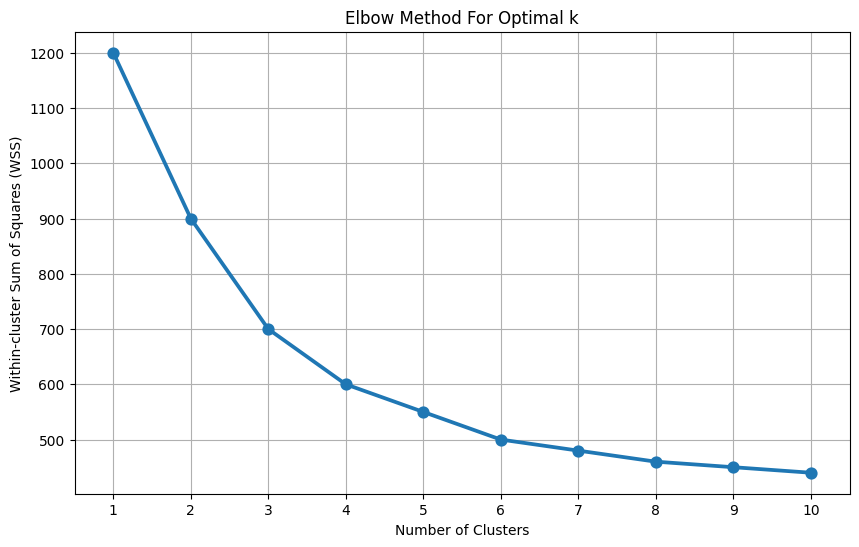

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
a = range(1, 11)  # x-values (e.g., number of clusters)
wss = [1200, 900, 700, 600, 550, 500, 480, 460, 450, 440]  # y-values (e.g., within-cluster sum of squares)

# Create a DataFrame
data = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Create the point plot
plt.figure(figsize=(10, 6))  # Optional: set figure size
sns.pointplot(x='Number of Clusters', y='WSS', data=data, markers='o', linestyles='-')

# Customize the plot
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.grid(True)

# Show the plot
plt.show()

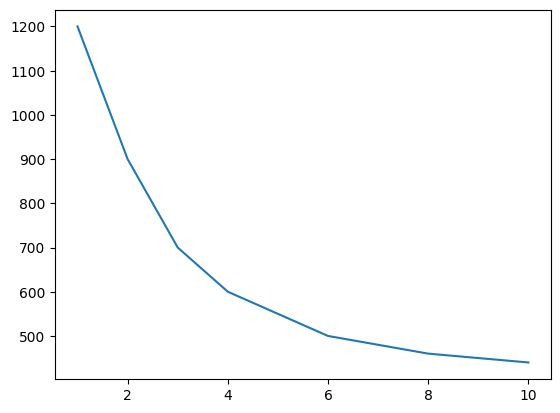

In [29]:
plt.plot(range(1,11), wss)

In [30]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.20502996945673266

In [33]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [34]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
silhouette_score(scaled_df,labels,random_state=1)

0.2225976544595981

In [36]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [37]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score(scaled_df,labels,random_state=1)

0.21923089994716974

In [39]:
BankData["Clus_kmeans5"] = labels
BankData.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans5
0,1,227,147,111,2460,639,1
1,2,123,86,65,3510,436,0
2,3,306,149,76,2570,669,1
3,4,251,112,129,3650,623,0
4,5,174,135,128,3400,579,0


In [40]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2203713459994038
For n_clusters=3, the silhouette score is 0.219957077093165
For n_clusters=4, the silhouette score is 0.22501079243028344
For n_clusters=5, the silhouette score is 0.20642864647252848
For n_clusters=6, the silhouette score is 0.2158545039412162
For n_clusters=7, the silhouette score is 0.2061931473974418
For n_clusters=8, the silhouette score is 0.19661032223166205
For n_clusters=9, the silhouette score is 0.21234052137797677
For n_clusters=10, the silhouette score is 0.2048745546506562


In [42]:
BankData.Clus_kmeans5.value_counts().sort_index()

Clus_kmeans5
0     90
1    113
2     91
3     92
4    129
Name: count, dtype: int64

In [43]:
clust_profile=BankData.drop(['Bank'],axis=1)
clust_profile=BankData.groupby('Clus_kmeans5').mean()
clust_profile['freq']=BankData.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans5,,,,,,,
0,254.833333,183.633333,86.744444,102.711111,3073.388889,509.211111,90
1,267.929204,285.194690,194.734513,86.389381,2548.761062,699.283186,113
2,278.516484,170.505495,168.879121,53.098901,2970.659341,525.527473,91
3,209.576087,187.336957,197.608696,99.521739,2993.043478,621.076087,92
4,271.573643,295.387597,110.441860,70.348837,3108.914729,608.302326,129


Some Recommendations
The banks in Cluster 0 has high DD , but average Deposit. So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.

Customers in Cluster 0 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.

Customers preferring DD payment can go to banks either in Cluster 0 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 1 (if they want small space where probably quick transaction can happen due to less crowd holding capacity)

Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 1 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.

Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.

Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.

Banks in cluster 1, 2 and 3, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 4 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.

In [44]:
#BankData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/BankData.xlsx')